In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from matplotlib import rc
import seaborn as sns
from sklearn.feature_selection import f_regression, mutual_info_regression 

df=pd.read_csv('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/data/OnlineNewsPopularity.csv', sep=', ')
df.head()

/var/folders/pv/h923lk3s0nj8fscmw56yh3980000gn/T/ipykernel_88291/372872801.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/data/OnlineNewsPopularity.csv', sep=', ')


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Part I: EDA

In [2]:
#number of rows and cols
rows = len(df.axes[0])
columns = len(df.axes[1])
print('Number of rows: ' + str(rows))
print('Number of cols: ' + str(columns))

Number of rows: 39644
Number of cols: 61


In [3]:
#datatype of each column
pd.set_option('display.max_rows', None)
df.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

The target variable we want to measure here is whether the online news is popular or not. Since the variable 'share' is a continuous data point, we need to caculate its percentail and then decide the specific value for the categories.

In [4]:
#The target varible is popularity of shares
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

From the data shown above, we could pick different percentiles for classifying the popularity extent.
1st category ('0: poor') to be values equal to or smaller than 946 (0%-25% percentile)
2nd category ('1: average') to be values between 946 and 1400 (25%-50% percentile)
3rd category ('2: average') to be values between 1401 and 2800 (50%-75% percentile)
4nd category ('3: excellent') to be values larger than 2800 (75%-100% percentile)

In [5]:
#establish categories for our target variable
df['shares'] = np.where(df['shares'] <=946, 0, df['shares'])
df['shares'] = np.where((df['shares'] > 946) & (df['shares'] <= 1400), 1, df['shares'])
df['shares'] = np.where((df['shares'] > 1400) & (df['shares'] <= 2800), 2, df['shares'])
df['shares'] = np.where(df['shares'] >2800, 3, df['shares'])
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,2
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


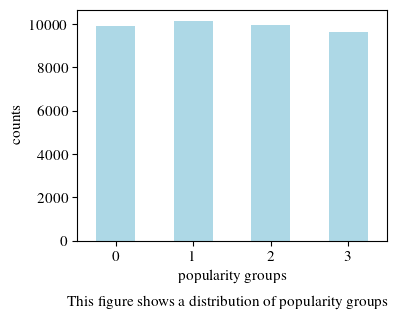

In [7]:
#visualize the target variable in histogram
plt.rcParams["figure.figsize"] = (4,3)
pd.value_counts(df['shares']).sort_index().plot.bar(color = ['lightblue'])
plt.xticks(rotation = 360,size=11)
plt.yticks(size=11)
plt.xlabel('popularity groups',size=11)
plt.ylabel('counts',size=11)
txt = "This figure shows a distribution of popularity groups"
plt.figtext(0.5, -0.11, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/population.png', format='png', bbox_inches="tight", dpi=300)
plt.show()


Summary of the target variable:
From the histogram, we can easily tell that the distribution of the target variable is mostly equally distributed, which does not have any skewness.

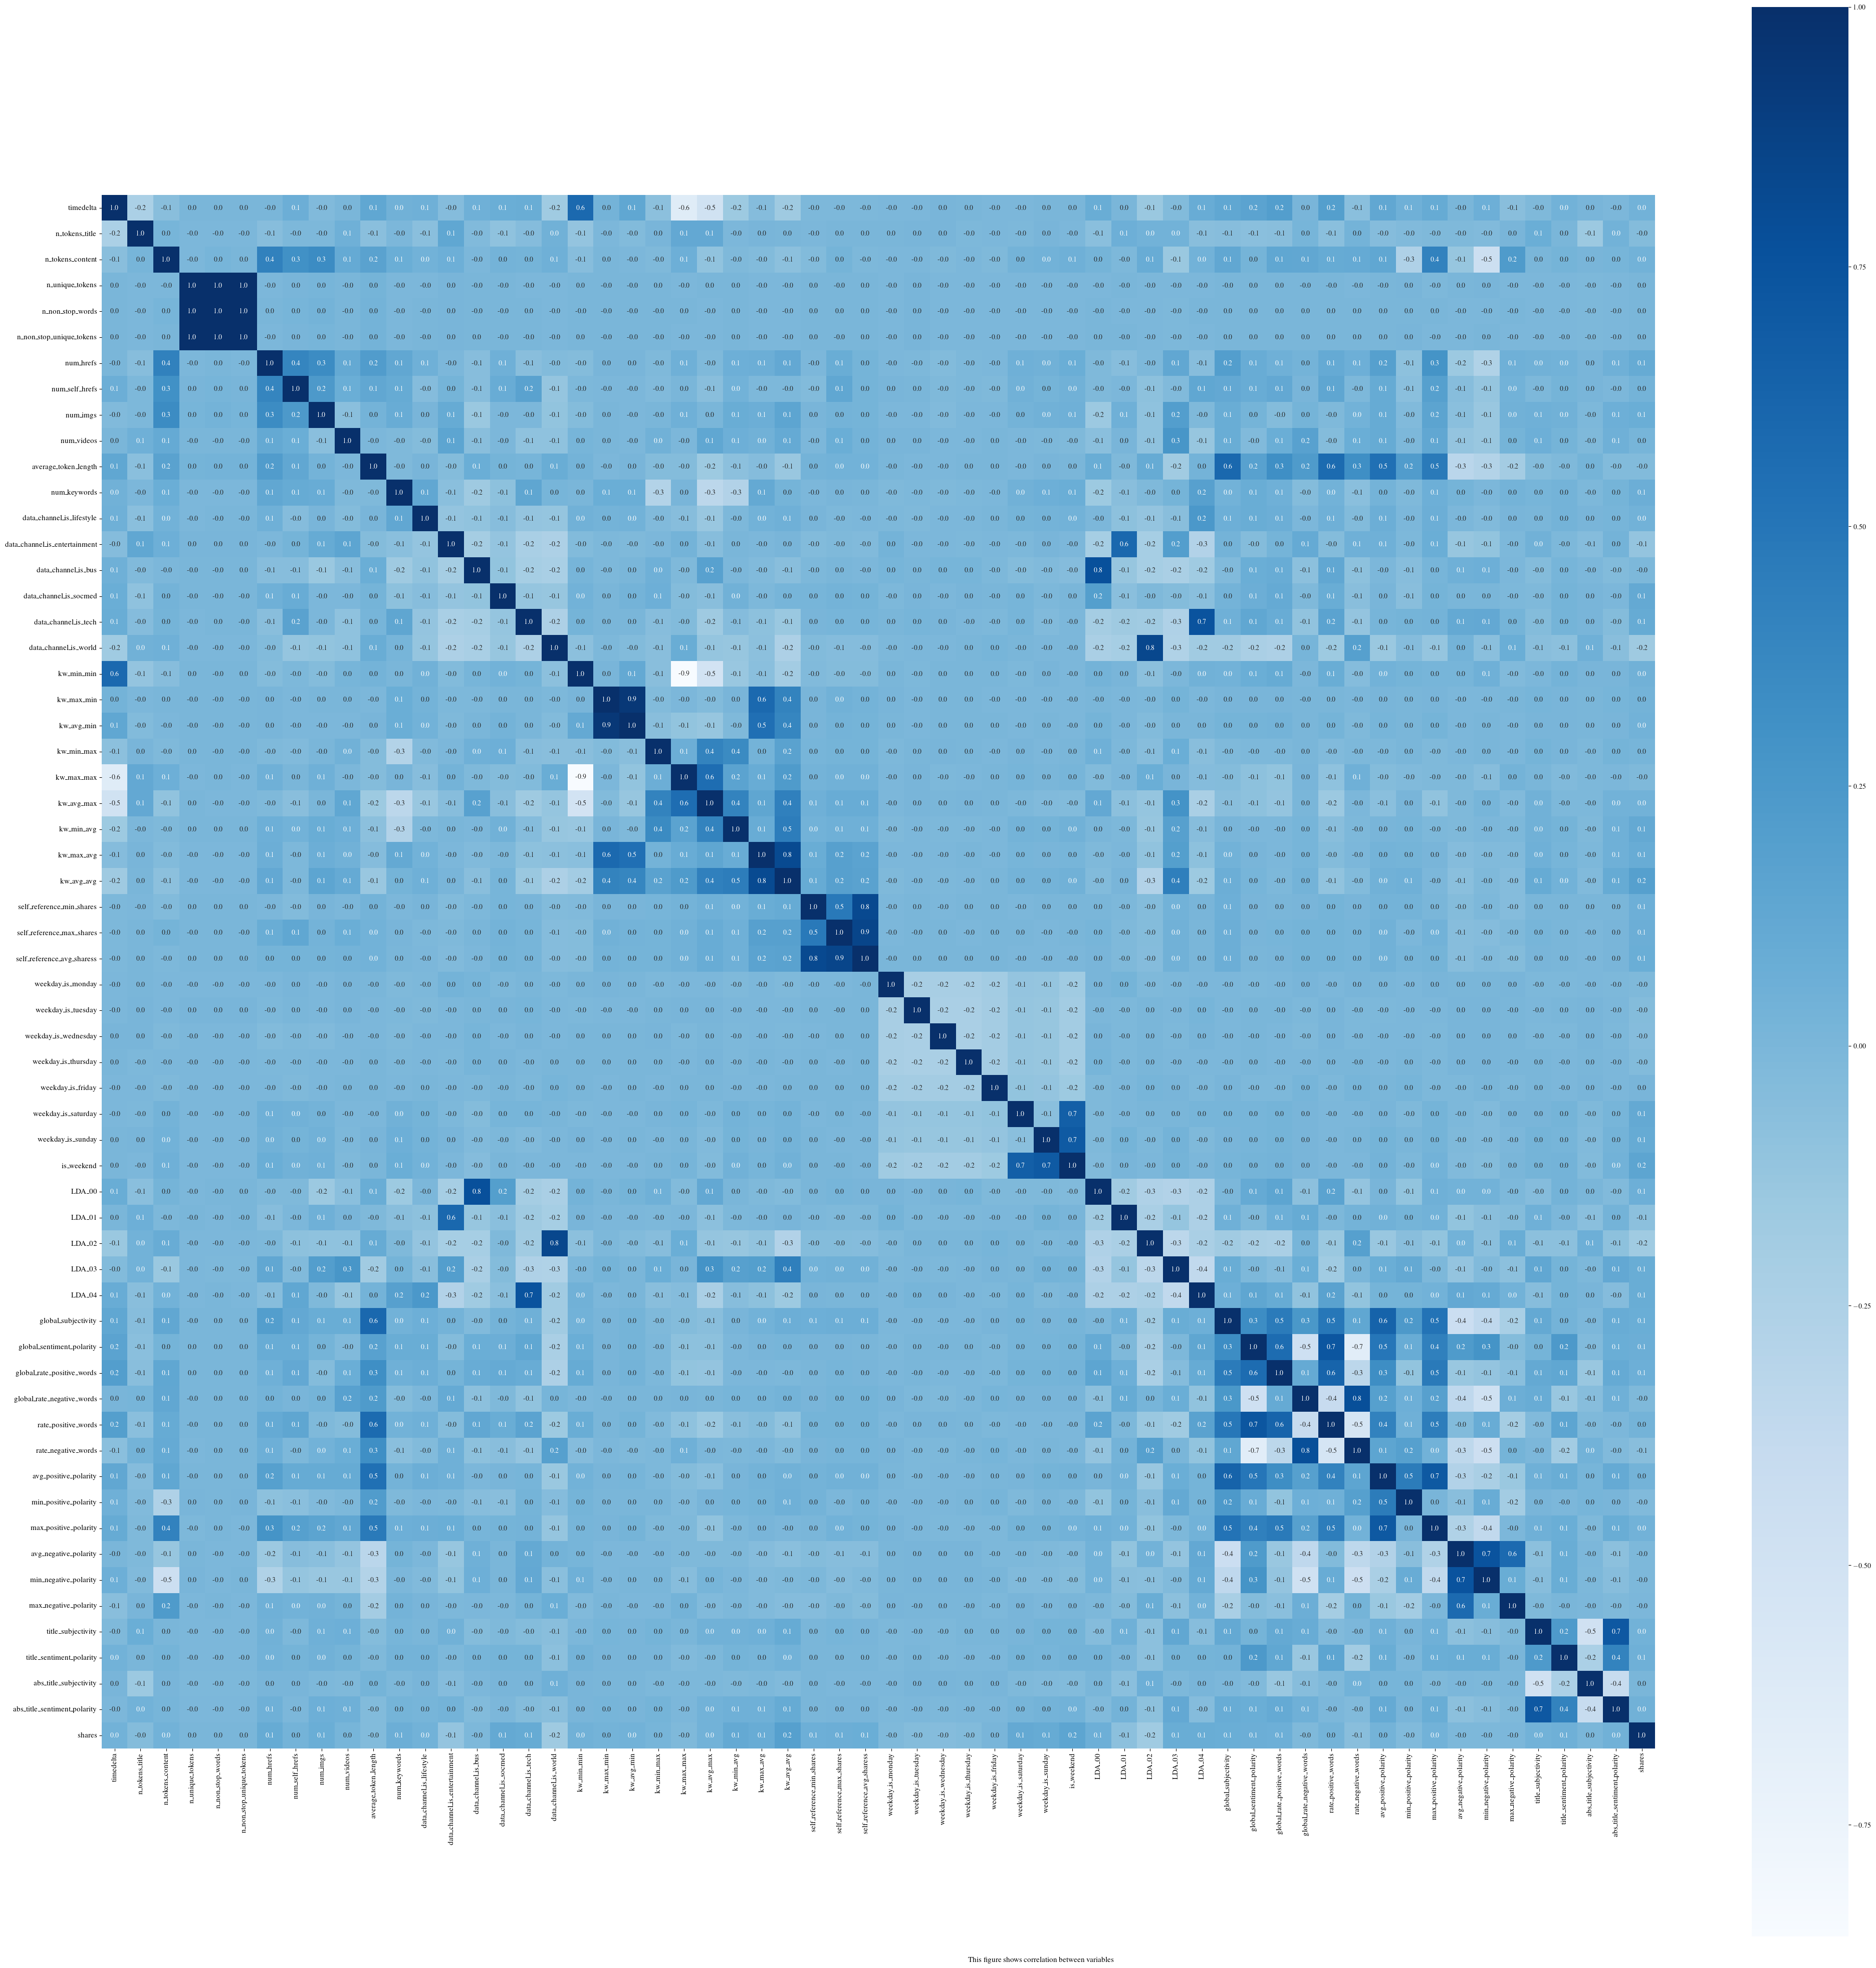

In [12]:
#plot the correlation graph
corr = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')
plt.xticks(size=11)
plt.yticks(size=11)
txt = "This figure shows correlation between variables"
plt.figtext(0.5, 0.1, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/correltion.png', format='png', bbox_inches="tight", dpi=300)

In [13]:
#caculate the correlation coefficient from each feature
corr_matrix=df.corr()
corr_matrix.head(100)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.036129
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,-0.043947
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.037823
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.004952
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.006032
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.004002
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.098591
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,0.034745
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.076777
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.014269


In [14]:
# Find features with correlation greater than 0.95
corr_abs = df.corr().abs()
high_corr_var=np.where(corr_abs>0.8)
high_corr_var=[(corr_abs.columns[x],corr_abs.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[('n_unique_tokens', 'n_non_stop_words'), ('n_unique_tokens', 'n_non_stop_unique_tokens'), ('n_non_stop_words', 'n_non_stop_unique_tokens'), ('data_channel_is_world', 'LDA_02'), ('kw_min_min', 'kw_max_max'), ('kw_max_min', 'kw_avg_min'), ('kw_max_avg', 'kw_avg_avg'), ('self_reference_min_shares', 'self_reference_avg_sharess'), ('self_reference_max_shares', 'self_reference_avg_sharess')]


As we could tell from the graphs and list above, there are three features ('n_unique_tokens', 'n_non_stop_unique_tokens', 'n_non_stop_words') that have extremely strong correlation with each other(coeffiecnt stronger than 0.95), so we need to drop two of those features and just leave one. Here I will just leave feature 'n_unique_tokens' and drop the rest two.

In [15]:
#drop features that are extremely correlated with other features
df=df.drop(['n_non_stop_words'], axis=1)
df=df.drop(['n_non_stop_unique_tokens'], axis=1)
df.shape

(39644, 59)

In [16]:
#find the most 5 correlated feature(absoulte value) with target varibale
corr_matrix=df.corr()
corr1 = corr_matrix["shares"].abs().sort_values(ascending=False)
corr = corr1.loc[corr1 != 1]
df_corr=pd.DataFrame(corr)
df_corr5=df_corr.head(5)
df_corr5

,shares
kw_avg_avg,0.193097
LDA_02,0.169741
data_channel_is_world,0.164418
is_weekend,0.150927
data_channel_is_socmed,0.114574


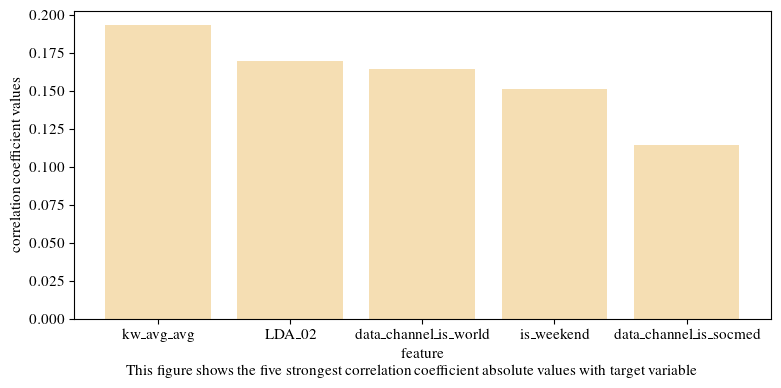

In [17]:
#plot the five strongest correlation coefficient value with target variable
plt.figure(figsize=(9,4))
plt.rcParams['figure.facecolor'] = 'white'
plt.bar(df_corr5.index, df_corr5['shares'],color = ['wheat'])
txt = "This figure shows the five strongest correlation coefficient absolute values with target variable"
plt.figtext(0.5, -0.03, txt, ha='center', size=11)
plt.xticks(size=11)
plt.yticks(size=11)
plt.xlabel('feature',size=11)
plt.ylabel('correlation coefficient values',size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/corr.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

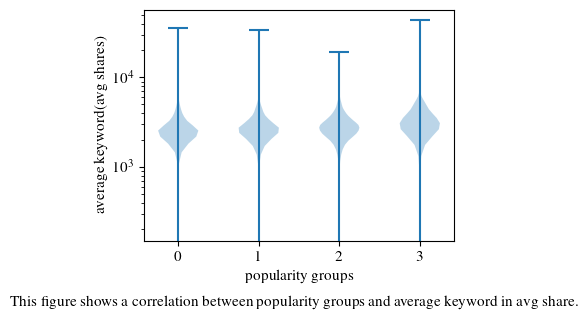

In [18]:
# 1. Violinplot for shares vs kw_avg_avg
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams['axes.facecolor'] = 'white'
dataset = [df[df['shares']==0]['kw_avg_avg'].values,
           df[df['shares']==1]['kw_avg_avg'].values,
            df[df['shares']==2]['kw_avg_avg'].values,
          df[df['shares']==3]['kw_avg_avg'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4],['0','1','2','3'],size=11)
plt.yticks(size=11)
plt.xlabel('popularity groups',size=11)
plt.ylabel('average keyword(avg shares)',size=11)
plt.semilogy()
txt = "This figure shows a correlation between popularity groups and average keyword in avg share."
plt.figtext(0.5, -0.11, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/kw_avg_avg.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

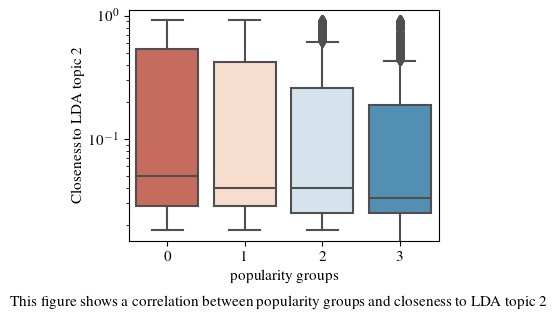

In [19]:
# 2. Boxplot for shares vs LDA_02
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams['axes.facecolor'] = 'white'
sns.boxplot(data=df, x='shares', y='LDA_02',palette = "RdBu")
plt.xlabel('popularity groups',size=11)
plt.ylabel('Closeness to LDA topic 2',size=11)
plt.xticks(size=11)
plt.yticks(size=11)
plt.semilogy()
txt = "This figure shows a correlation between popularity groups and closeness to LDA topic 2"
plt.figtext(0.5, -0.11, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/LDA_02.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

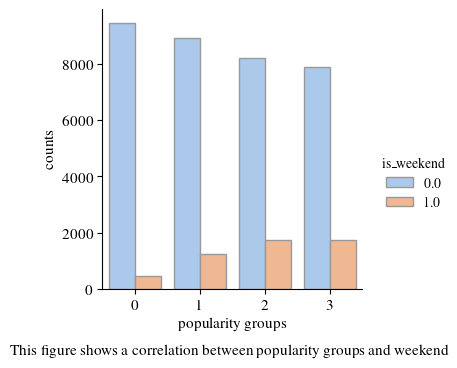

In [20]:
#3. bar plot for shares vs is_weekend
plt.rcParams['axes.facecolor'] = 'white'
sns.catplot(
    data=df, x="shares", hue="is_weekend", kind="count",
    palette="pastel", edgecolor=".6", height=3.5)
# plt.rcParams["figure.figsize"] = (2,1)
# plt.figure(figsize=(4, 3))
plt.xlabel('popularity groups',size=11)
plt.ylabel('counts',size=11)
plt.xticks(size=11)
plt.yticks(size=11)
txt = "This figure shows a correlation between popularity groups and weekend"
plt.figtext(0.5, -0.03, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/is_weekend.png', format='png', bbox_inches="tight", dpi=300)

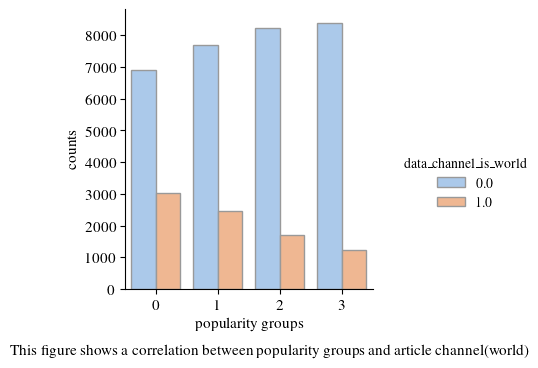

In [21]:
#4. bar plot for shares vs data_channel_is_world
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (4,3)
sns.catplot(
    data=df, x="shares", hue="data_channel_is_world", kind="count",
    palette="pastel", edgecolor=".6",height = 3.5)
plt.xlabel('popularity groups',size=11)
plt.ylabel('counts',size=11)
plt.xticks(size=11)
plt.yticks(size=11)
txt = "This figure shows a correlation between popularity groups and article channel(world)"
plt.figtext(0.5, -0.03, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/world_channel.png', format='png', bbox_inches="tight", dpi=300)

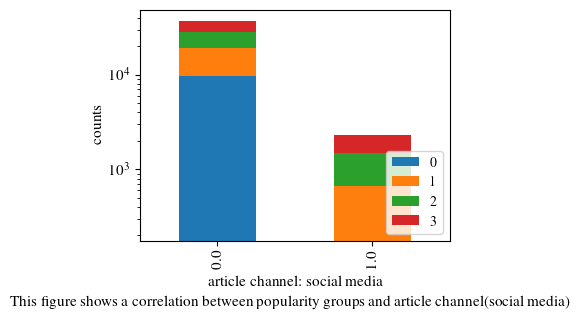

In [22]:
#5: stacked bar plot for popularity groups vs data_channel_is_socmed
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams['figure.facecolor'] = 'white'
count_matrix = df.groupby(['data_channel_is_socmed', 'shares']).size().unstack()
count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('counts',size=11)
plt.xlabel('article channel: social media',size=11)
plt.xticks(size=11)
plt.yticks(size=11)
plt.semilogy()
plt.legend(loc=4)
txt = "This figure shows a correlation between popularity groups and article channel(social media)"
plt.figtext(0.5, -0.11, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/socmed.png', format='png', bbox_inches="tight", dpi=300)

plot some interesting plots for feature vs feature (coefficient > 0.7)

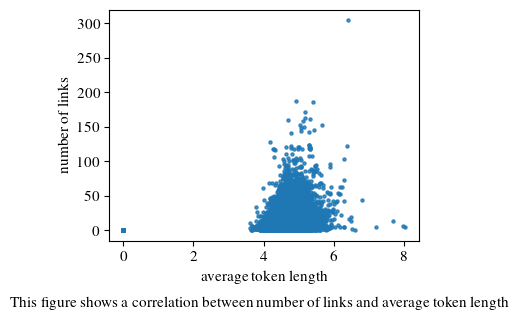

In [23]:
#6.Scatterplot for average_token_length (feature) vs. number of links (feature)
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(df['average_token_length'],df['num_hrefs'], alpha=0.8, s = 5)
plt.ylabel('number of links',size=11)
plt.xlabel('average token length',size=11)
plt.xticks(size=11)
plt.yticks(size=11)
# plt.legend(loc=4)
txt = "This figure shows a correlation between number of links and average token length"
plt.figtext(0.5, -0.11, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/ftr1.png', format='png', bbox_inches="tight", dpi=300)
plt.show()

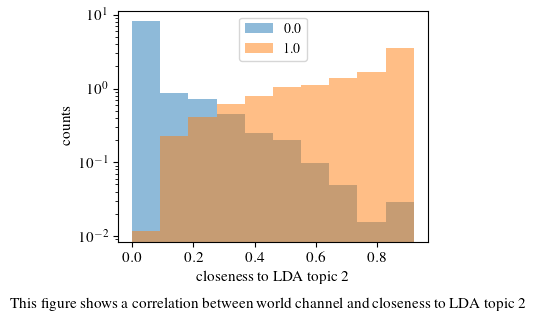

In [24]:
#7. Category-specific histograms for LDA_02 and data_channel_is_world
plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams['axes.facecolor'] = 'white'
categories = df['data_channel_is_world'].unique()
bin_range = (df['LDA_02'].min(),df['LDA_02'].max())

for c in categories:
        plt.hist(df[df['data_channel_is_world']==c]['LDA_02'],alpha=0.5,label=c, range=bin_range, bins=10, density=True)

plt.legend()
plt.ylabel('counts', size=11)
plt.xlabel('closeness to LDA topic 2',size=11)
plt.xticks(size=11)
plt.yticks(size=11)
plt.semilogy()
txt = "This figure shows a correlation between world channel and closeness to LDA topic 2"
plt.figtext(0.5, -0.11, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/ftr2.png', format='png', bbox_inches="tight", dpi=300)
plt.show()
        

Part II: Data Preprocessing

1). Data Split:
Since the online news information from this dataset is all collected from Mashable(www.mashable.com) and each of them are independent from the others. The dataset does not have any group structures and time-series data. Thus, it is an iid dataset. I would conduct KFold splitting method.

In [25]:
#Before splitting, I would eliminate the non-predictive column (url) from the dataset.
df=df.drop(['url'], axis=1)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731.0,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731.0,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,2
3,731.0,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1
4,731.0,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
random_state =42

X=df.drop(columns=['shares'])
y=df['shares']

# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print('   test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 

#check for reproducability
print(X_train.head())
print(X_val.head())
print(X_test.head())

   test set: (7929, 57) (7929,)
   training set: (23786, 57) (23786,)
   validation set: (7929, 57) (7929,)
   training set: (23786, 57) (23786,)
   validation set: (7929, 57) (7929,)
   training set: (23786, 57) (23786,)
   validation set: (7929, 57) (7929,)
   training set: (23787, 57) (23787,)
   validation set: (7928, 57) (7928,)
       timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
19837      338.0            15.0             628.0         0.509709   
904        715.0            11.0             409.0         0.519608   
23876      262.0             7.0             345.0         0.609329   
22966      279.0            11.0             217.0         0.580189   
4705       647.0            13.0             123.0         0.739837   

       num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
19837       14.0             1.0       1.0         0.0              5.090764   
904          2.0             0.0       1.0         0.0              4.958435 

In [27]:
#find the missing value
print("missing values in features:\n", df.isnull().sum())

missing values in features:
 timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_sharess

There is no missing value in this dataset, so we don't have to deal with sort of problem.

Since the original dataset has already encoder categorical variables (columns relates to "post date" and 'channel type" using OneHotEncoder, and all the of the columns are numerical values, we should only need to preprocessing the continuous data with StandardScaler and MinMaxScaler method.
For the continuous data which has clear bound, such as the 'rate' columns and the columns related to NLP information, which normally have bound from (-1,0), (1,0) or (-1,1), I would us MinMaxSclaer preprocessor. 
For the rest, I would use StandardScaler preprocessor to process.

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

random_state = 42

# standardscaler feature

std_ftrs = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 
            'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 
            'self_reference_avg_sharess']

#minmaxscaler feature 
minmax_ftrs = ['global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 
               'rate_negative_words', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
            'global_subjectivity', 'global_sentiment_polarity','avg_positive_polarity','min_positive_polarity', 
            'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
            'title_subjectivity','title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']

# standard scaler
std_transformer = Pipeline(steps=[('std', StandardScaler())])

# minmax encoder
minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[('std', std_transformer, std_ftrs),
                 ('minmax', minmax_transformer, minmax_ftrs)])

#fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)

#the feature names after fit
feature_names = preprocessor.get_feature_names_out()

#transform the train
df_train= pd.DataFrame(data=X_prep,columns=feature_names)
print('Shape of transformed X_train:',df_train.shape)

#transform the val
X_val_prep = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=X_val_prep,columns = feature_names)
print('Shape of transformed X_val:',df_val.shape)

#transform the test
X_test_prep = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)
print('Shape of transformed X_test:',df_test.shape)

print('Feature name:', feature_names)


Shape of transformed X_train: (23787, 42)
Shape of transformed X_val: (7928, 42)
Shape of transformed X_test: (7929, 42)
Feature name: ['std__n_tokens_title' 'std__n_tokens_content' 'std__n_unique_tokens'
 'std__num_hrefs' 'std__num_self_hrefs' 'std__num_imgs' 'std__num_videos'
 'std__average_token_length' 'std__num_keywords' 'std__kw_min_min'
 'std__kw_max_min' 'std__kw_avg_min' 'std__kw_min_max' 'std__kw_max_max'
 'std__kw_avg_max' 'std__kw_min_avg' 'std__kw_max_avg' 'std__kw_avg_avg'
 'std__self_reference_min_shares' 'std__self_reference_max_shares'
 'std__self_reference_avg_sharess' 'minmax__global_rate_positive_words'
 'minmax__global_rate_negative_words' 'minmax__rate_positive_words'
 'minmax__rate_negative_words' 'minmax__LDA_00' 'minmax__LDA_01'
 'minmax__LDA_02' 'minmax__LDA_03' 'minmax__LDA_04'
 'minmax__global_subjectivity' 'minmax__global_sentiment_polarity'
 'minmax__avg_positive_polarity' 'minmax__min_positive_polarity'
 'minmax__max_positive_polarity' 'minmax__avg_negati

Linear F_score: timedelta 32.75280690268407
Linear F_score: n_tokens_title 28.327363174995153
Linear F_score: n_tokens_content 24.90946891021619
Linear F_score: n_unique_tokens 0.826249396463427
Linear F_score: num_hrefs 130.19975774556025
Linear F_score: num_self_hrefs 21.75829857636607
Linear F_score: num_imgs 82.10495671406358
Linear F_score: num_videos 10.498495720797713
Linear F_score: average_token_length 22.878416238427683
Linear F_score: num_keywords 70.10794532416456
Linear F_score: data_channel_is_lifestyle 24.017115570138518
Linear F_score: data_channel_is_entertainment 204.51694296036808
Linear F_score: data_channel_is_bus 14.622693746543765
Linear F_score: data_channel_is_socmed 191.24655179539727
Linear F_score: data_channel_is_tech 177.74455039272294
Linear F_score: data_channel_is_world 370.1699304659265
Linear F_score: kw_min_min 40.2068214765613
Linear F_score: kw_max_min 11.997486906898162
Linear F_score: kw_avg_min 20.66786390420613
Linear F_score: kw_min_max 4.6737

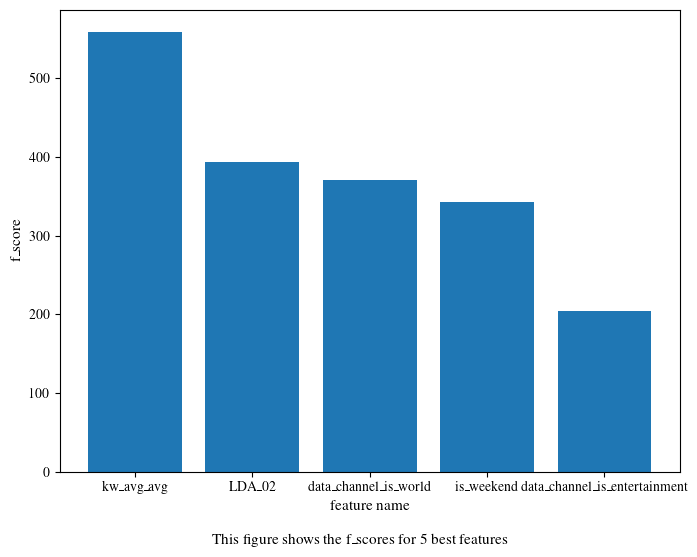

In [37]:
#for classification problem, we use f_classif, mutual_info_classif
from sklearn.feature_selection import f_classif, mutual_info_classif

np.random.seed(10)

#caculate f_test for each feature
X=df.drop(columns=['shares'])
y=df['shares']
f_test, p_values = f_classif(X,y)
mi = mutual_info_classif(X,y)

for i in range(len(X_train.columns)):
    print('Linear F_score: ' + X_train.columns[i], f_test[i])

#plot the top 5 most important five feature (linear)
df_ftest={'name':X.columns,"f":f_test}
df_ftest=pd.DataFrame(df_ftest)
plt.figure(figsize=(8,6))
best_value = df_ftest.sort_values(by = 'f', ascending = False).head(5) 
plt.bar(best_value['name'],best_value['f'])
plt.ylabel('f_score', size=11)
plt.xlabel('feature name',size=11)
txt = "This figure shows the f_scores for 5 best features"
plt.figtext(0.5, -0.01, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/f_test.png', format='png', bbox_inches="tight", dpi=300)
plt.show()


Non-Linear mi_score: timedelta 0.042725931627990654
Non-Linear mi_score: n_tokens_title 0.0056859830763875685
Non-Linear mi_score: n_tokens_content 0.000809674801684146
Non-Linear mi_score: n_unique_tokens 0.0073615118640151245
Non-Linear mi_score: num_hrefs 0.005023322645307804
Non-Linear mi_score: num_self_hrefs 0.010285180955773132
Non-Linear mi_score: num_imgs 0.013436818001768991
Non-Linear mi_score: num_videos 0.0038749965462558933
Non-Linear mi_score: average_token_length 0.0015139330994333733
Non-Linear mi_score: num_keywords 0.0
Non-Linear mi_score: data_channel_is_lifestyle 0.0034925409656221262
Non-Linear mi_score: data_channel_is_entertainment 0.009259381469250982
Non-Linear mi_score: data_channel_is_bus 2.24455623865083e-07
Non-Linear mi_score: data_channel_is_socmed 0.00734284588419154
Non-Linear mi_score: data_channel_is_tech 0.007968581725364743
Non-Linear mi_score: data_channel_is_world 0.01624201746072229
Non-Linear mi_score: kw_min_min 0.005327662570703939
Non-Linear

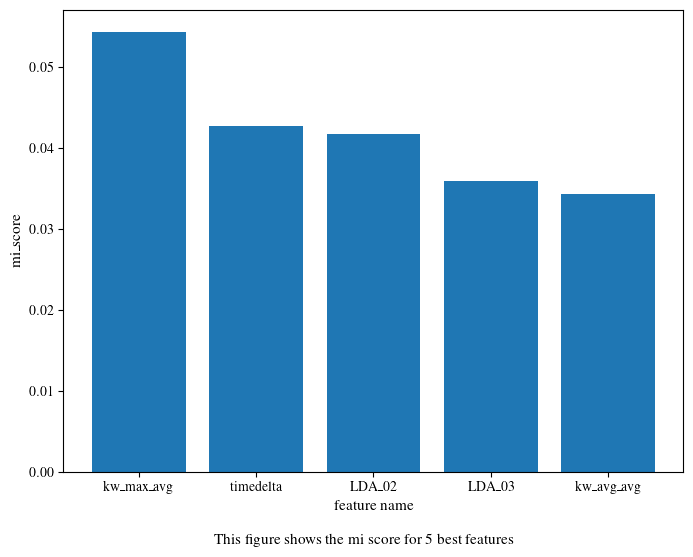

In [39]:
#caculate the mi score for each features
for i in range(len(X_train.columns)):
    print('Non-Linear mi_score:',X_train.columns[i], mi[i])

#plot the top five important feature (non-linear)
df_mtest={'name':X.columns,"mi":mi}
df_mtest=pd.DataFrame(df_mtest)
plt.figure(figsize=(8,6))
best_value = df_mtest.sort_values(by = 'mi', ascending = False).head(5) 
plt.bar(best_value['name'],best_value['mi'])
plt.ylabel('mi_score',size=11)
plt.xlabel('feature name',size=11)


txt = "This figure shows the mi score for 5 best features"
plt.figtext(0.5, -0.01, txt, ha='center', size=11)
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.savefig('/Users/qinmiaodeng/Desktop/DATA1030-Fall2022/Data1030-Project/fig/mi.png', format='png', bbox_inches="tight", dpi=300)
plt.show()
